In [1]:
import time
import numpy as np
import pytesseract
import pyautogui as gui
import matplotlib.pyplot as plt
from IPython.display import clear_output

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

# Coordinates
SOURCE = {'x': 196, 'y': 693, 'width': 46, 'height': 22}
TARGET = {'x': 259, 'y': 693, 'width': 46, 'height': 22}
CURRENT_PAGE = {'x': 652, 'y': 693, 'width': 22, 'height': 22}
LAST_PAGE = {'x': 687, 'y': 693, 'width': 25, 'height': 22}
NEXT = {'x': 740, 'y': 400, 'width': 1, 'height': 1}
BUTTON = (765, 705)

In [4]:
while True:
    time.sleep(5)
    img_target = gui.screenshot(region=(TARGET['x'], TARGET['y'], TARGET['width'], TARGET['height']))
    time_target = pytesseract.image_to_string(img_target)[:-2]

    img_last_page = gui.screenshot(region=(LAST_PAGE['x'], LAST_PAGE['y'], LAST_PAGE['width'], LAST_PAGE['height']))
    last_page = int(pytesseract.image_to_string(img_last_page, config='--psm 13 --oem 3 -c tessedit_char_whitelist=0123456789')[:-2])

    img_curret_page = gui.screenshot(region=(CURRENT_PAGE['x'], CURRENT_PAGE['y'], CURRENT_PAGE['width'], CURRENT_PAGE['height']))
    current_page = int(pytesseract.image_to_string(img_curret_page, config='--psm 13 --oem 3 -c tessedit_char_whitelist=0123456789')[:-2])
    while True:
        time.sleep(1)
        img_source = gui.screenshot(region=(SOURCE['x'], SOURCE['y'], SOURCE['width'], SOURCE['height']))
        time_source = pytesseract.image_to_string(img_source)[:-2]
        clear_output(wait=True)
        print(f"Time lapsed: {time_source} (Target: {time_target}) Page: {current_page:02}/{last_page:02}")
        if (len(time_target) == 5) and (time_source == time_target):
            x, y = gui.position()
            gui.click(*BUTTON)
            gui.moveTo(x, y)
            next_btn = gui.screenshot(region=(NEXT['x'], NEXT['y'], NEXT['width'], NEXT['height']))
            if np.array_equal(np.asarray(next_btn)[0, 0], np.array([192, 121, 2])):
                gui.click(NEXT['x'], NEXT['y'])
            break

Time lapsed: 04:47 (Target: 05:50) Page: 07/12


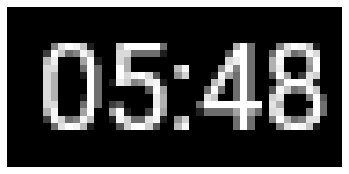

'05:48'

In [10]:
# Test
SOURCE = {'x': 196, 'y': 693, 'width': 46, 'height': 22}
img = gui.screenshot(region=(SOURCE['x'], SOURCE['y'], SOURCE['width'], SOURCE['height']))
plt.imshow(img)
plt.axis('off')
plt.show()
pytesseract.image_to_string(img)[:-2]